In [1]:
# IMPORT LIBRARIES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from collections import Counter

### EXPLORE RIDERS AND TRIPS DATA SETS

In [3]:
# LOAD THE DATA SET OF RIDERS.CSV INTO PANDAS AND CHECK THE CHARACTERISTICS

In [4]:
df_riders = pd.read_csv("riders.csv")

In [5]:
df_riders.head()

,user_id,signup_date,loyalty_status,age,city,avg_rating_given,churn_prob,referred_by
0,R00000,2025-01-24,Bronze,34.729629,Nairobi,5.0,0.142431,R00001
1,R00001,2024-09-09,Bronze,34.571020,Nairobi,4.7,0.674161,NaN
2,R00002,2024-09-07,Bronze,47.133960,Lagos,4.2,0.510379,NaN
3,R00003,2025-03-17,Bronze,41.658628,Nairobi,4.9,0.244779,NaN
4,R00004,2024-08-20,Silver,40.681709,Lagos,3.9,0.269960,R00002


### Dimensionality

In [6]:
#Get the number of rows and columns
df_riders.shape

(10000, 8)

In [7]:
#Examine the columns/features of the data
df_riders.columns

Index(['user_id', 'signup_date', 'loyalty_status', 'age', 'city',
       'avg_rating_given', 'churn_prob', 'referred_by'],
      dtype='object')

### Investigate the data Set and types

In [8]:
df_riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           10000 non-null  object 
 1   signup_date       10000 non-null  object 
 2   loyalty_status    10000 non-null  object 
 3   age               10000 non-null  float64
 4   city              10000 non-null  object 
 5   avg_rating_given  10000 non-null  float64
 6   churn_prob        10000 non-null  float64
 7   referred_by       3053 non-null   object 
dtypes: float64(3), object(5)
memory usage: 625.1+ KB


### Numerical Statistical Analysis

In [9]:
df_riders.describe()

,age,avg_rating_given,churn_prob
count,10000.000000,10000.000000,10000.000000
mean,35.154221,4.461510,0.286168
std,9.545528,0.429162,0.159029
min,18.000000,2.600000,0.002934
25%,28.317568,4.200000,0.161691
50%,35.037671,4.500000,0.266712
75%,41.691186,4.800000,0.388812
max,70.000000,5.000000,0.913302


### Categorical Statistical Analysis

In [10]:
df_riders.describe(include = ['object', 'bool'])

,user_id,signup_date,loyalty_status,city,referred_by
count,10000,10000,10000,10000,3053
unique,10000,731,4,3,1660
top,R09983,2025-02-21,Bronze,Cairo,R00002
freq,1,26,6057,3374,46


### Data Cleaning

In [11]:
#Dealing with Missing Data
null_riders = df_riders.isnull().sum()
null_riders

user_id                0
signup_date            0
loyalty_status         0
age                    0
city                   0
avg_rating_given       0
churn_prob             0
referred_by         6947
dtype: int64

### Visualize the Missing Data

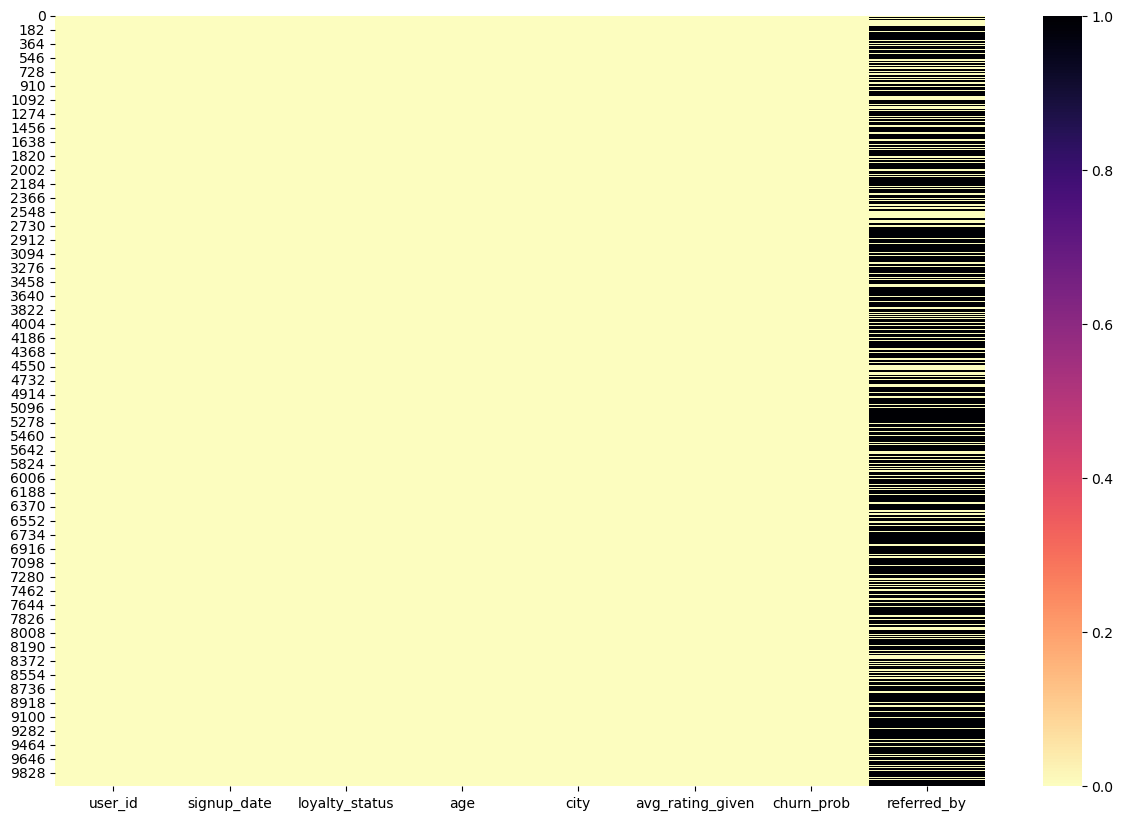

In [12]:
plt.figure(figsize = (15,10))
sns.heatmap(df_riders.isnull(), cbar=True, cmap='magma_r');

In [13]:
# The heatmap revealed that column 'referred_by' has 6947 null values

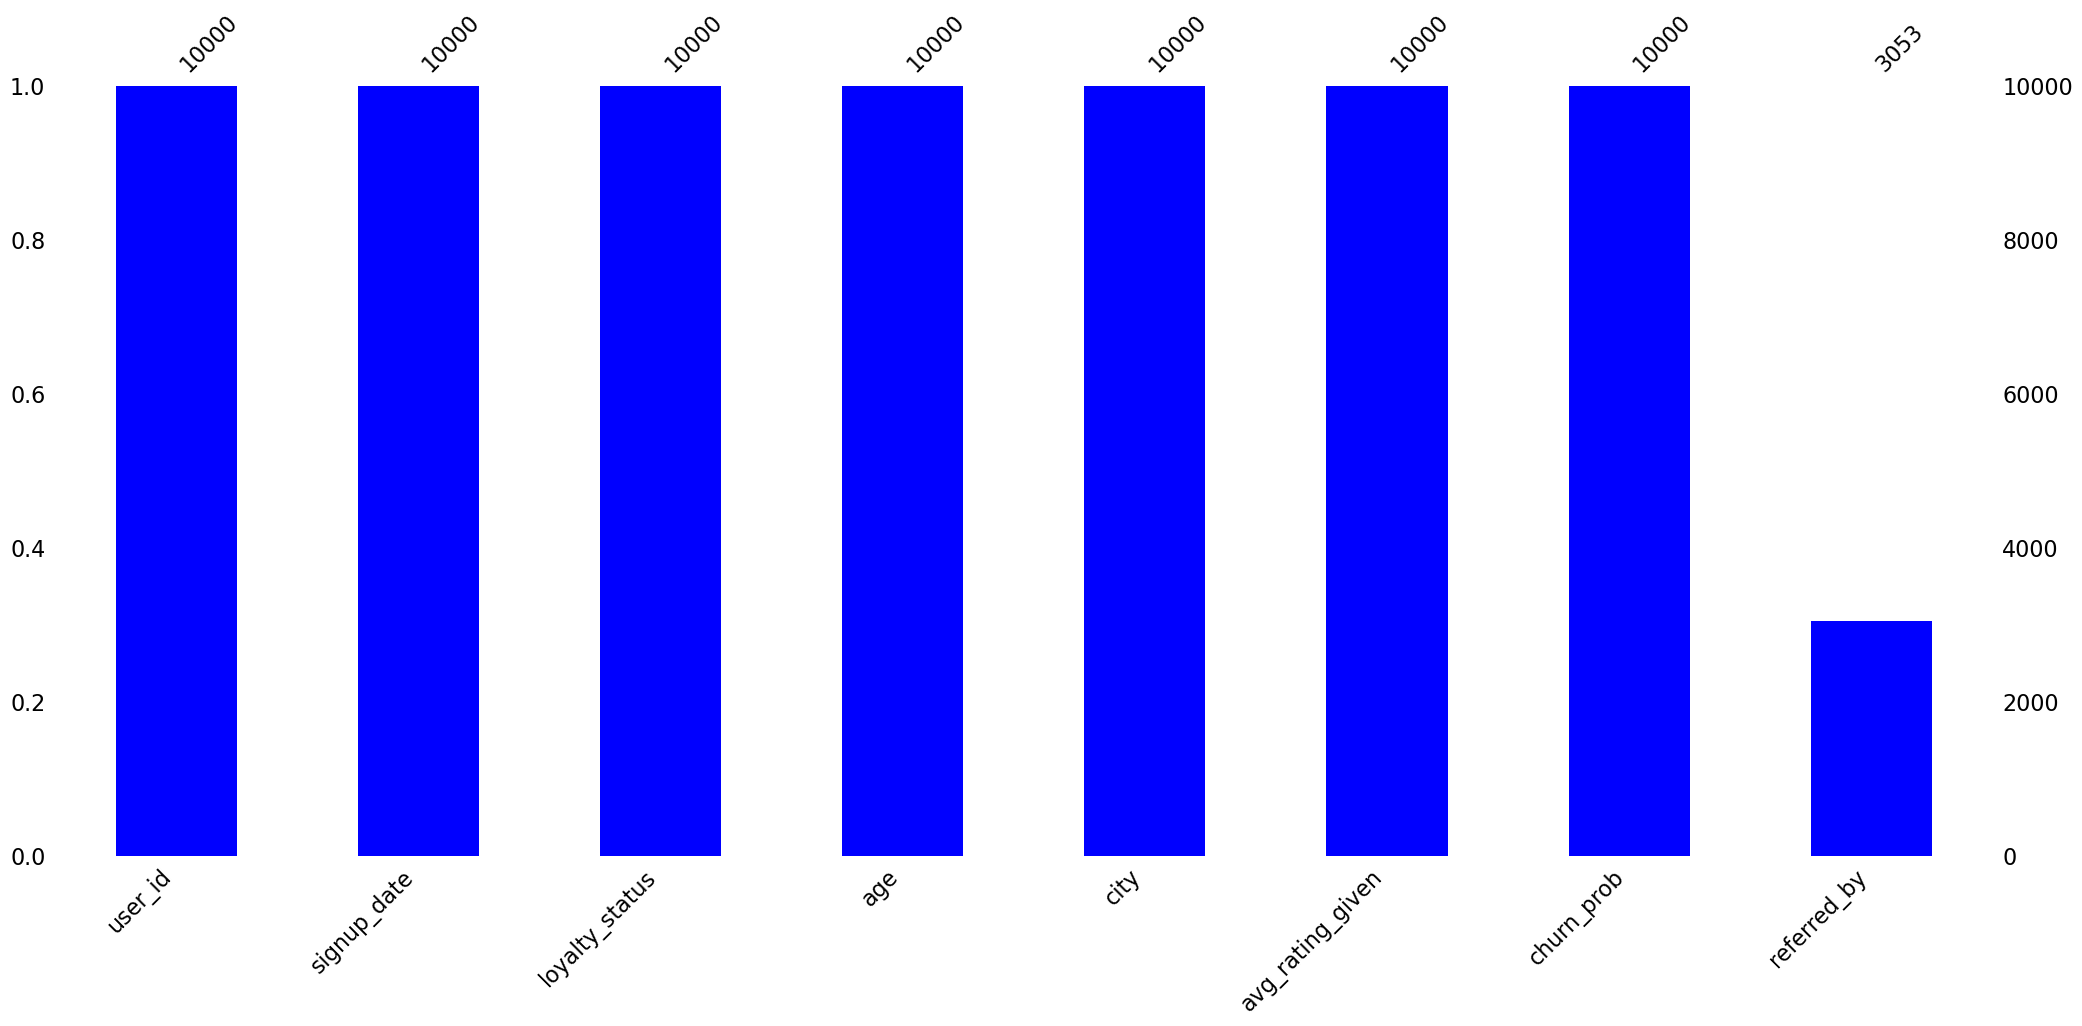

In [14]:
msno.bar(df_riders, color = 'blue');

In [15]:
#Drop referred_by
df_riders.drop("referred_by", axis=1, inplace=True)

In [16]:
df_riders.head(2)

,user_id,signup_date,loyalty_status,age,city,avg_rating_given,churn_prob
0,R00000,2025-01-24,Bronze,34.729629,Nairobi,5.0,0.142431
1,R00001,2024-09-09,Bronze,34.571020,Nairobi,4.7,0.674161


In [17]:
# convert signup_date to datetime
df_riders["signup_date"] = pd.to_datetime(df_riders["signup_date"])

In [18]:
df_riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           10000 non-null  object        
 1   signup_date       10000 non-null  datetime64[ns]
 2   loyalty_status    10000 non-null  object        
 3   age               10000 non-null  float64       
 4   city              10000 non-null  object        
 5   avg_rating_given  10000 non-null  float64       
 6   churn_prob        10000 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 547.0+ KB


In [19]:
# Extract the year, Month, Quarter
df_riders['year'] = df_riders['signup_date'].dt.year
df_riders['month'] = df_riders['signup_date'].dt.month
df_riders['month_name'] = df_riders['signup_date'].dt.month_name()
df_riders['quarter'] = df_riders['signup_date'].dt.quarter
df_riders.head(2)

,user_id,signup_date,loyalty_status,age,city,avg_rating_given,churn_prob,year,month,month_name,quarter
0,R00000,2025-01-24,Bronze,34.729629,Nairobi,5.0,0.142431,2025,1,January,1
1,R00001,2024-09-09,Bronze,34.571020,Nairobi,4.7,0.674161,2024,9,September,3


In [20]:
df_riders["age"].min()

18.0

In [21]:
# Group Riders age
def age_group(x):
    if x <= 25:
        return "young Adult"
    elif x <= 40:
        return "Adult"
    elif x <= 50:
        return "Old Adult"
    else:
        return "Elders"
# Apply function to the data
df_riders["age_group"]=df_riders["age"].apply(age_group)
df_riders.head(2)

,user_id,signup_date,loyalty_status,age,city,avg_rating_given,churn_prob,year,month,month_name,quarter,age_group
0,R00000,2025-01-24,Bronze,34.729629,Nairobi,5.0,0.142431,2025,1,January,1,Adult
1,R00001,2024-09-09,Bronze,34.571020,Nairobi,4.7,0.674161,2024,9,September,3,Adult


In [22]:
# Group avg_rating_given
def riders_rating_group(x):
    if x <= 2.5:
        return "bad rating"
    elif x <= 3.5:
        return "fair rating"
    elif x <= 4.0:
        return " good rating"
    else:
        return "best rating"
# Apply function to the data
df_riders["riders_rating_group"]= df_riders["avg_rating_given"].apply(riders_rating_group)
df_riders.head(2)

,user_id,signup_date,loyalty_status,age,city,avg_rating_given,churn_prob,year,month,month_name,quarter,age_group,riders_rating_group
0,R00000,2025-01-24,Bronze,34.729629,Nairobi,5.0,0.142431,2025,1,January,1,Adult,best rating
1,R00001,2024-09-09,Bronze,34.571020,Nairobi,4.7,0.674161,2024,9,September,3,Adult,best rating


In [23]:
#determine the maximum churn_probability of riders
df_riders["churn_prob"].max()

0.9133019337420986

In [24]:
#determine the minimum churn_probability of riders
df_riders["churn_prob"].min()

0.0029339677588559

In [25]:
#Classify the Churn probability
def churn_prob_Class (x):
    if x <= 0.1:
        return "less_likely"
    if x <= 0.3:
        return "not_likely"
    if x <= 0.5:
        return "likely"
    if x <= 0.75:
        return "more_likely"
    else:
        return "most_likely"
#Apply function to the data
df_riders["churn_prob_Class"] = df_riders["churn_prob"].apply(churn_prob_Class)
df_riders.head(2)        

,user_id,signup_date,loyalty_status,age,city,avg_rating_given,churn_prob,year,month,month_name,quarter,age_group,riders_rating_group,churn_prob_Class
0,R00000,2025-01-24,Bronze,34.729629,Nairobi,5.0,0.142431,2025,1,January,1,Adult,best rating,not_likely
1,R00001,2024-09-09,Bronze,34.571020,Nairobi,4.7,0.674161,2024,9,September,3,Adult,best rating,more_likely


### Univariate Analysis

##### Summary statistics of individual variables/column/feature
##### Numerical column/feature = Numerical Visualization Techniques
##### Categorical Column/feature = Categorical Visualization Technique

In [26]:
df_riders.columns

Index(['user_id', 'signup_date', 'loyalty_status', 'age', 'city',
       'avg_rating_given', 'churn_prob', 'year', 'month', 'month_name',
       'quarter', 'age_group', 'riders_rating_group', 'churn_prob_Class'],
      dtype='object')

<Axes: xlabel='loyalty_status', ylabel='count'>

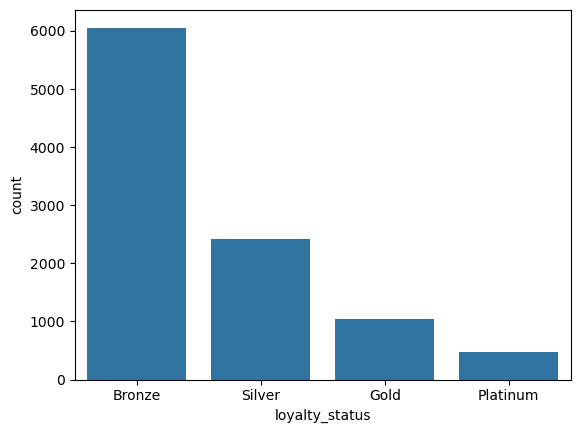

In [27]:
# Number of Riders by loyalty_status
sns.countplot(x='loyalty_status', data=df_riders)

In [ ]:
#The chart reveals that the number of bronze riders is the largest, followed by silver and gold, while  the least

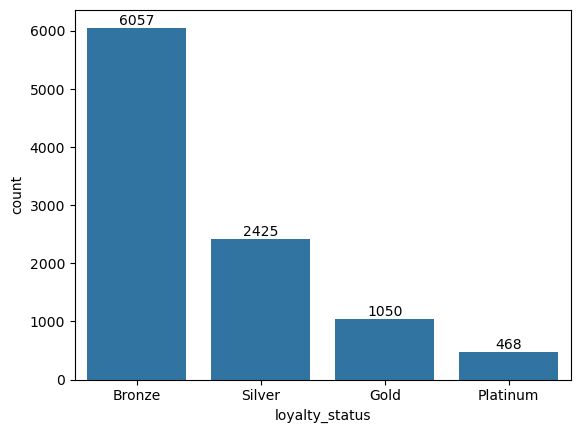

In [28]:
# Analyse data in order
ax = sns.countplot(x=df_riders['loyalty_status'], order=df_riders['loyalty_status'].value_counts(ascending=False).index)
values = df_riders['loyalty_status'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

In [29]:
#The analysis revealed that Bronze are the riders while platinum are the least

In [30]:
df_riders.columns

Index(['user_id', 'signup_date', 'loyalty_status', 'age', 'city',
       'avg_rating_given', 'churn_prob', 'year', 'month', 'month_name',
       'quarter', 'age_group', 'riders_rating_group', 'churn_prob_Class'],
      dtype='object')

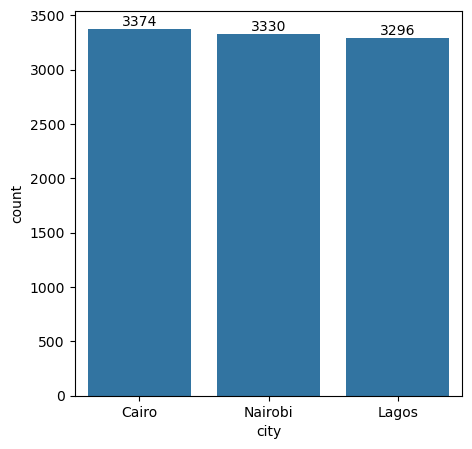

In [31]:
#Total number of Riders per city
plt.figure(figsize=(5, 5))
ax = sns.countplot(x=df_riders['city'], order=df_riders['city'].value_counts(ascending=False).index)
values = df_riders['city'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

In [32]:
#From the chart Cairo has the highest number of Riders followed by Nairobi and Lagos respectively

In [33]:
df_riders.columns

Index(['user_id', 'signup_date', 'loyalty_status', 'age', 'city',
       'avg_rating_given', 'churn_prob', 'year', 'month', 'month_name',
       'quarter', 'age_group', 'riders_rating_group', 'churn_prob_Class'],
      dtype='object')

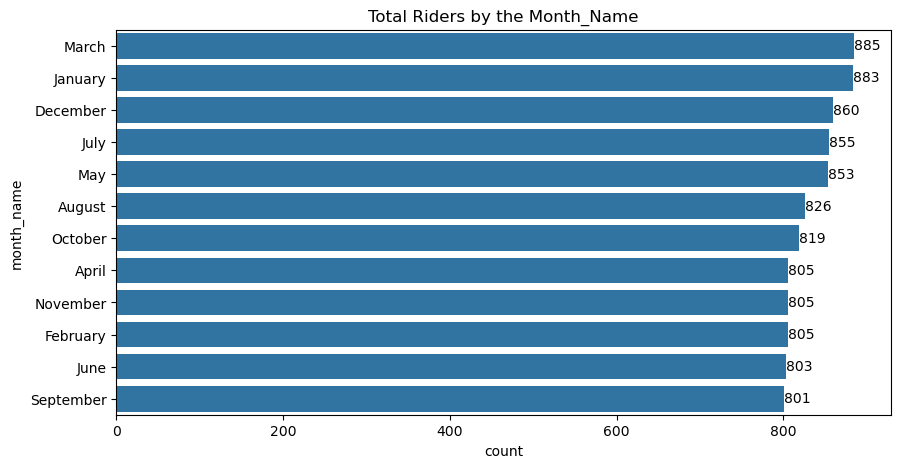

In [34]:
#Total Riders by Month Name
plt.figure(figsize=(10, 5))
ax = sns.countplot(y=df_riders['month_name'], order=df_riders['month_name'].value_counts(ascending=False).index)
values = df_riders['month_name'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);
ax.set_title('Total Riders by the Month_Name');

In [35]:
# From the chart, 26 - 40 years (Adult) made the most trips, and those above 51 years made the least

In [36]:
df_riders.columns

Index(['user_id', 'signup_date', 'loyalty_status', 'age', 'city',
       'avg_rating_given', 'churn_prob', 'year', 'month', 'month_name',
       'quarter', 'age_group', 'riders_rating_group', 'churn_prob_Class'],
      dtype='object')

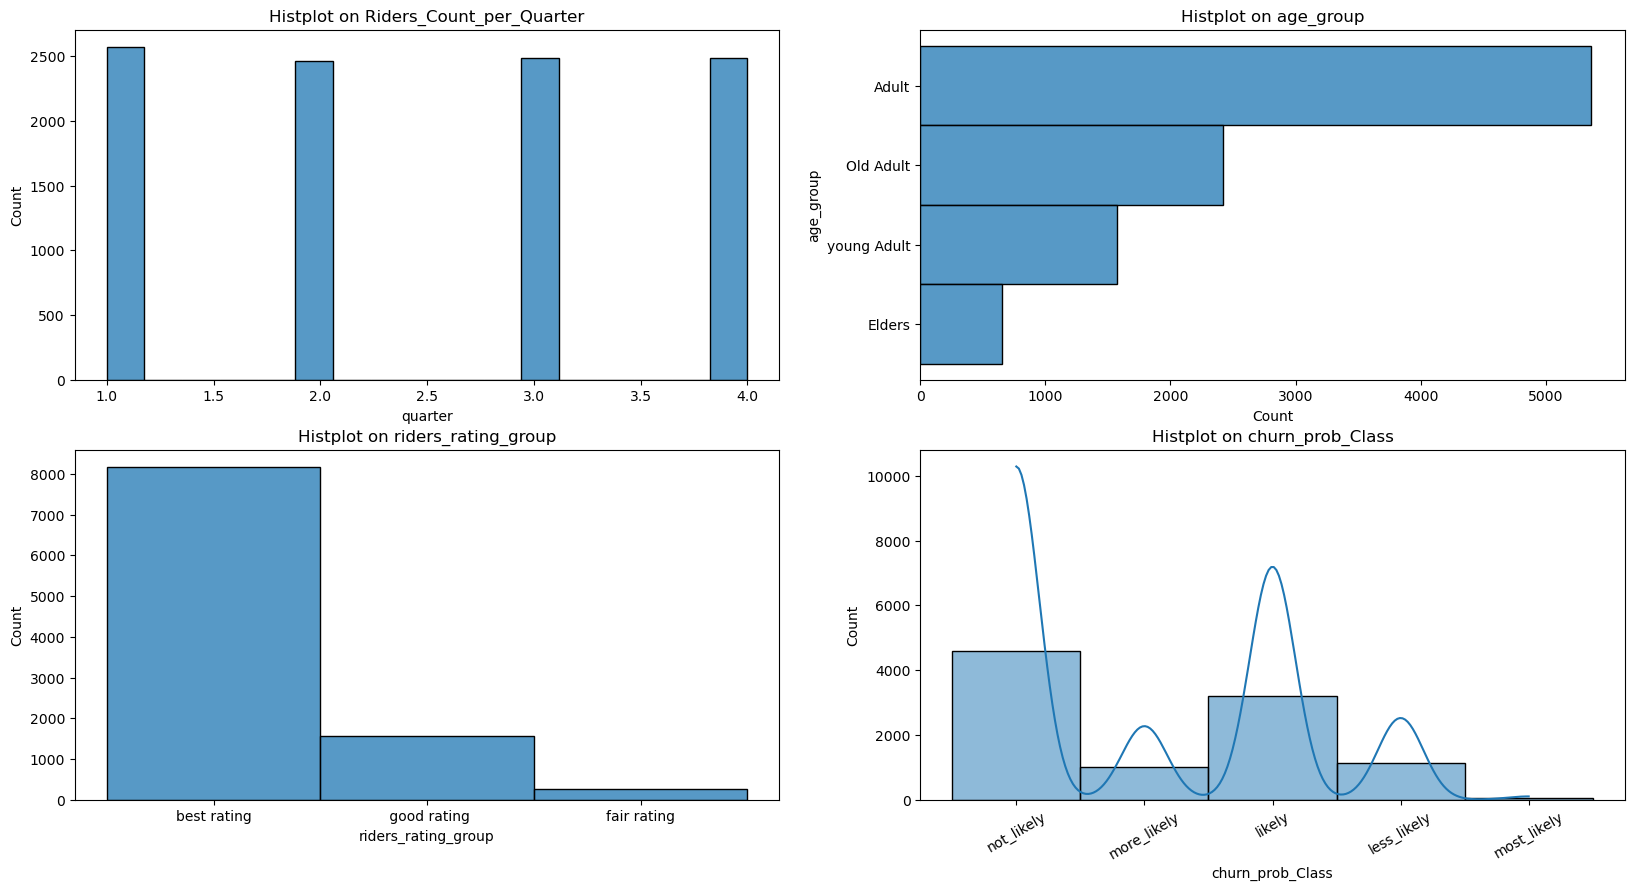

In [37]:
# Total No of Riders per quarter, age_group, riders_rating_group and churn_prob_Class -Subplot
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(20, 10))
sns.histplot(x='quarter', data=df_riders, ax=axs[0,0])
axs[0,0].set_title('Histplot on Riders_Count_per_Quarter')


sns.histplot(y='age_group', data=df_riders, ax=axs[0,1])
axs[0,1].set_title('Histplot on age_group')


sns.histplot(x='riders_rating_group', data=df_riders, ax=axs[1,0])
axs[1,0].set_title('Histplot on riders_rating_group')


sns.histplot(data = df_riders, x="churn_prob_Class", ax=axs[1,1], bins=20, kde=True)
plt.xticks(rotation=30)
axs[1,1].set_title('Histplot on churn_prob_Class');


In [38]:
# From the chart,Adult made the most trips, and those above the elderly years made the least, 

In [39]:
# LOAD THE DATA SET OF TRIPS.CSV INTO PANDAS AND CHECK THE CHARACTERISTICS

In [40]:
df_trips = pd.read_csv("trips.csv")

In [41]:
df_trips.head()

,trip_id,user_id,driver_id,fare,surge_multiplier,tip,payment_type,pickup_time,dropoff_time,pickup_lat,pickup_lng,dropoff_lat,dropoff_lng,weather,city,loyalty_status
0,T000000,R05207,D00315,12.11,1.0,0.00,Card,2024-11-27 18:41:50+02:27,2024-11-27 19:33:50+02:27,-1.108123,36.912209,-1.068155,36.875377,Foggy,Nairobi,Bronze
1,T000001,R09453,D03717,8.73,1.0,0.02,Card,2024-10-28 23:13:48+00:14,2024-10-28 23:26:48+00:14,6.675266,3.515740,6.641734,3.525620,Sunny,Lagos,Gold
2,T000002,R00567,D02035,19.68,1.0,0.00,Card,2025-02-17 05:36:41+02:27,2025-02-17 05:52:41+02:27,-1.248589,37.010668,-1.273182,37.018586,Cloudy,Nairobi,Bronze
3,T000003,R09573,D02657,16.43,1.0,0.01,Mobile Money,2024-06-18 19:27:14+02:05,2024-06-18 19:32:14+02:05,29.819554,31.188780,29.837689,31.232978,Cloudy,Cairo,Bronze
4,T000004,R03446,D01026,8.70,1.0,1.06,Card,2024-10-05 09:58:16+02:27,2024-10-05 10:28:16+02:27,-1.676479,36.729219,-1.638395,36.694063,Sunny,Nairobi,Gold


In [42]:
df_trips.info()  # check data characteristics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   trip_id           200000 non-null  object 
 1   user_id           200000 non-null  object 
 2   driver_id         200000 non-null  object 
 3   fare              200000 non-null  float64
 4   surge_multiplier  200000 non-null  float64
 5   tip               200000 non-null  float64
 6   payment_type      200000 non-null  object 
 7   pickup_time       200000 non-null  object 
 8   dropoff_time      200000 non-null  object 
 9   pickup_lat        200000 non-null  float64
 10  pickup_lng        200000 non-null  float64
 11  dropoff_lat       200000 non-null  float64
 12  dropoff_lng       200000 non-null  float64
 13  weather           200000 non-null  object 
 14  city              200000 non-null  object 
 15  loyalty_status    200000 non-null  object 
dtypes: float64(7), objec

In [43]:
# No missing value

In [44]:
# numerical Analysis
df_trips.describe()

,fare,surge_multiplier,tip,pickup_lat,pickup_lng,dropoff_lat,dropoff_lng
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,15.401285,1.141499,0.469566,11.849600,23.924133,11.849589,23.924173
std,6.163199,0.255362,1.100545,13.362151,14.577572,13.362229,14.577642
min,2.970000,1.000000,0.000000,-1.786360,2.879224,-1.833220,2.830979
25%,11.000000,1.000000,0.000000,-1.172683,3.496574,-1.172868,3.497195
50%,14.130000,1.000000,0.000000,6.525574,31.238814,6.525235,31.239118
75%,18.350000,1.200000,0.400000,29.934766,36.703772,29.935056,36.704067
max,82.740000,3.800000,21.860000,30.544251,37.317090,30.592457,37.364817


In [45]:
# Categorical Analysis
df_trips.describe(include= "object")

,trip_id,user_id,driver_id,payment_type,pickup_time,dropoff_time,weather,city,loyalty_status
count,200000,200000,200000,200000,200000,200000,200000,200000,200000
unique,200000,10000,5000,3,199690,199663,4,3,4
top,T199983,R08152,D03093,Card,2024-10-20 09:22:52+02:27,2024-07-21 09:14:10+02:27,Sunny,Cairo,Bronze
freq,1,42,67,100326,2,3,120151,67436,121252


In [46]:
# convert pickup_time and dropoff_time to datetime
df_trips["pickup_time"] = pd.to_datetime(df_trips["pickup_time"], utc=True)
df_trips["dropoff_time"] = pd.to_datetime(df_trips["dropoff_time"], utc=True)

In [47]:
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   trip_id           200000 non-null  object             
 1   user_id           200000 non-null  object             
 2   driver_id         200000 non-null  object             
 3   fare              200000 non-null  float64            
 4   surge_multiplier  200000 non-null  float64            
 5   tip               200000 non-null  float64            
 6   payment_type      200000 non-null  object             
 7   pickup_time       200000 non-null  datetime64[ns, UTC]
 8   dropoff_time      200000 non-null  datetime64[ns, UTC]
 9   pickup_lat        200000 non-null  float64            
 10  pickup_lng        200000 non-null  float64            
 11  dropoff_lat       200000 non-null  float64            
 12  dropoff_lng       200000 non-null  float64  

### Univariate Analysis

##### Summary statistics of individual variables/column/feature
##### Numerical column/feature = Numerical Visualization Techniques
##### Categorical Column/feature = Categorical Visualization Technique

In [48]:
df_trips.columns 

Index(['trip_id', 'user_id', 'driver_id', 'fare', 'surge_multiplier', 'tip',
       'payment_type', 'pickup_time', 'dropoff_time', 'pickup_lat',
       'pickup_lng', 'dropoff_lat', 'dropoff_lng', 'weather', 'city',
       'loyalty_status'],
      dtype='object')

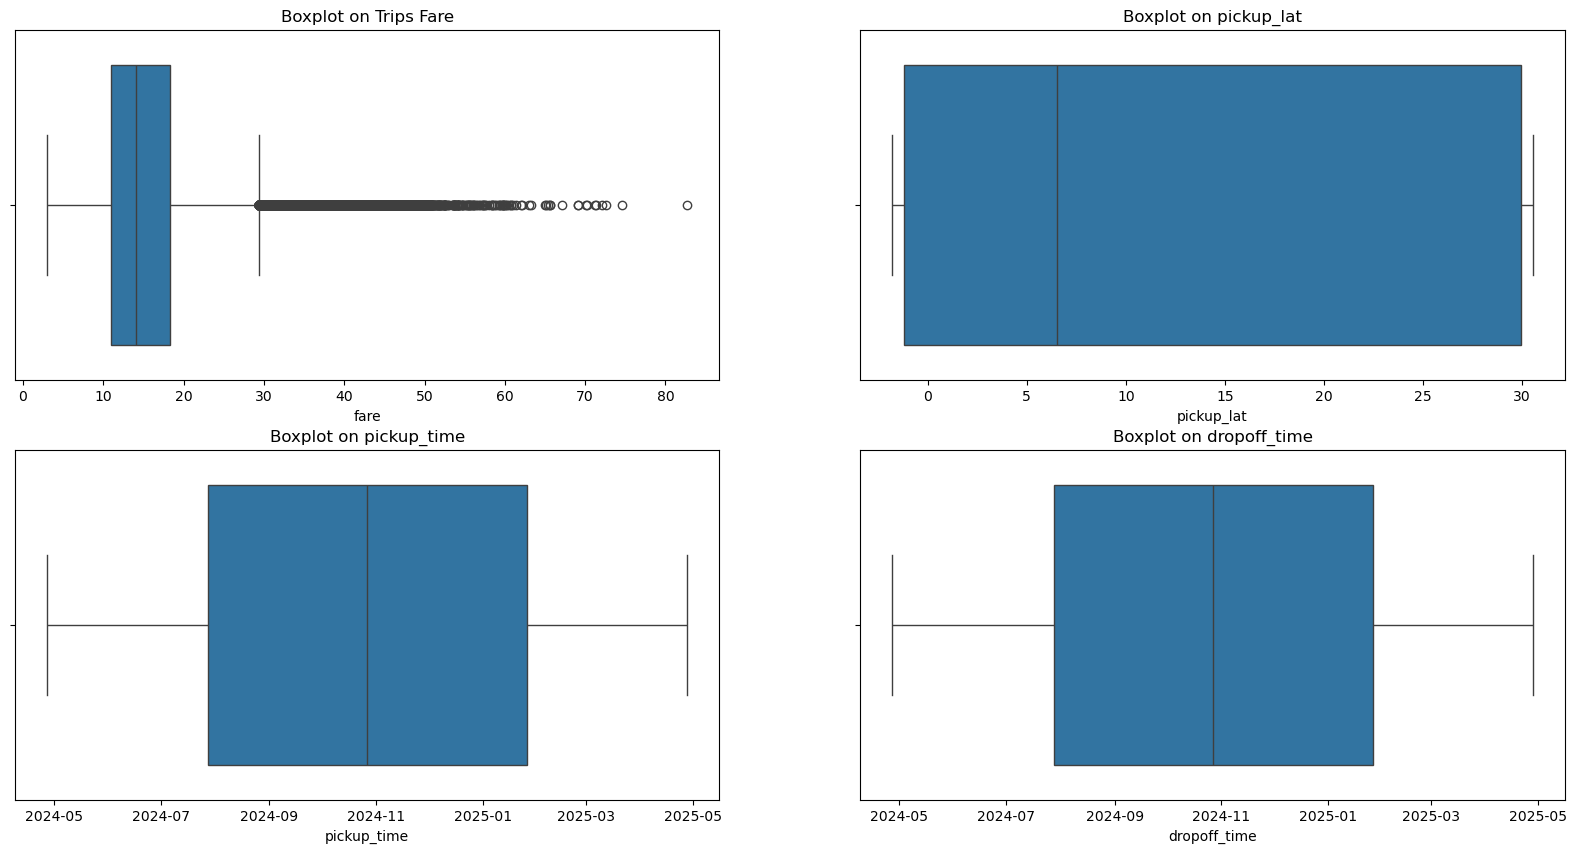

In [49]:
# Trip_fare, pickup_lat, pickup_time,dropoff_time, pickup_lng, dropoff_lat and dropoff_lng -Subplot
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(20, 10))
sns.boxplot(x='fare', data=df_trips, ax=axs[0,0])
axs[0,0].set_title('Boxplot on Trips Fare')

sns.boxplot(x='pickup_lat', data=df_trips, ax=axs[0,1])
axs[0,1].set_title('Boxplot on pickup_lat')


sns.boxplot(x='pickup_time', data=df_trips, ax=axs[1,0])
axs[1,0].set_title('Boxplot on pickup_time')


sns.boxplot(data = df_trips, x="dropoff_time", ax=axs[1,1])
axs[1,1].set_title('Boxplot on dropoff_time');





### Bivariate Analysis of df_riders and df_trips Datasets

In [50]:
df_riders.head(2)

,user_id,signup_date,loyalty_status,age,city,avg_rating_given,churn_prob,year,month,month_name,quarter,age_group,riders_rating_group,churn_prob_Class
0,R00000,2025-01-24,Bronze,34.729629,Nairobi,5.0,0.142431,2025,1,January,1,Adult,best rating,not_likely
1,R00001,2024-09-09,Bronze,34.571020,Nairobi,4.7,0.674161,2024,9,September,3,Adult,best rating,more_likely


In [51]:
df_trips.head(2)

,trip_id,user_id,driver_id,fare,surge_multiplier,tip,payment_type,pickup_time,dropoff_time,pickup_lat,pickup_lng,dropoff_lat,dropoff_lng,weather,city,loyalty_status
0,T000000,R05207,D00315,12.11,1.0,0.00,Card,2024-11-27 16:14:50+00:00,2024-11-27 17:06:50+00:00,-1.108123,36.912209,-1.068155,36.875377,Foggy,Nairobi,Bronze
1,T000001,R09453,D03717,8.73,1.0,0.02,Card,2024-10-28 22:59:48+00:00,2024-10-28 23:12:48+00:00,6.675266,3.515740,6.641734,3.525620,Sunny,Lagos,Gold


In [52]:
# Merge riders and Trips datasets
riders_trips = df_riders.merge(df_trips, on="user_id", how = "inner")

In [53]:
riders_trips.head(2)

,user_id,signup_date,loyalty_status_x,age,city_x,avg_rating_given,churn_prob,year,month,month_name,...,payment_type,pickup_time,dropoff_time,pickup_lat,pickup_lng,dropoff_lat,dropoff_lng,weather,city_y,loyalty_status_y
0,R00000,2025-01-24,Bronze,34.729629,Nairobi,5.0,0.142431,2025,1,January,...,Card,2024-09-03 22:29:02+00:00,2024-09-03 22:55:02+00:00,-1.115239,36.805339,-1.136842,36.793631,Rainy,Nairobi,Bronze
1,R00000,2025-01-24,Bronze,34.729629,Nairobi,5.0,0.142431,2025,1,January,...,Card,2025-04-02 14:46:29+00:00,2025-04-02 14:52:29+00:00,-1.350546,36.745210,-1.339873,36.770102,Sunny,Nairobi,Bronze


In [54]:
riders_trips.columns

Index(['user_id', 'signup_date', 'loyalty_status_x', 'age', 'city_x',
       'avg_rating_given', 'churn_prob', 'year', 'month', 'month_name',
       'quarter', 'age_group', 'riders_rating_group', 'churn_prob_Class',
       'trip_id', 'driver_id', 'fare', 'surge_multiplier', 'tip',
       'payment_type', 'pickup_time', 'dropoff_time', 'pickup_lat',
       'pickup_lng', 'dropoff_lat', 'dropoff_lng', 'weather', 'city_y',
       'loyalty_status_y'],
      dtype='object')

In [55]:
riders_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   user_id              200000 non-null  object             
 1   signup_date          200000 non-null  datetime64[ns]     
 2   loyalty_status_x     200000 non-null  object             
 3   age                  200000 non-null  float64            
 4   city_x               200000 non-null  object             
 5   avg_rating_given     200000 non-null  float64            
 6   churn_prob           200000 non-null  float64            
 7   year                 200000 non-null  int32              
 8   month                200000 non-null  int32              
 9   month_name           200000 non-null  object             
 10  quarter              200000 non-null  int32              
 11  age_group            200000 non-null  object             
 12  ri

In [56]:
riders_trips["user_id"].nunique()

10000

In [57]:
riders_trips.columns

Index(['user_id', 'signup_date', 'loyalty_status_x', 'age', 'city_x',
       'avg_rating_given', 'churn_prob', 'year', 'month', 'month_name',
       'quarter', 'age_group', 'riders_rating_group', 'churn_prob_Class',
       'trip_id', 'driver_id', 'fare', 'surge_multiplier', 'tip',
       'payment_type', 'pickup_time', 'dropoff_time', 'pickup_lat',
       'pickup_lng', 'dropoff_lat', 'dropoff_lng', 'weather', 'city_y',
       'loyalty_status_y'],
      dtype='object')

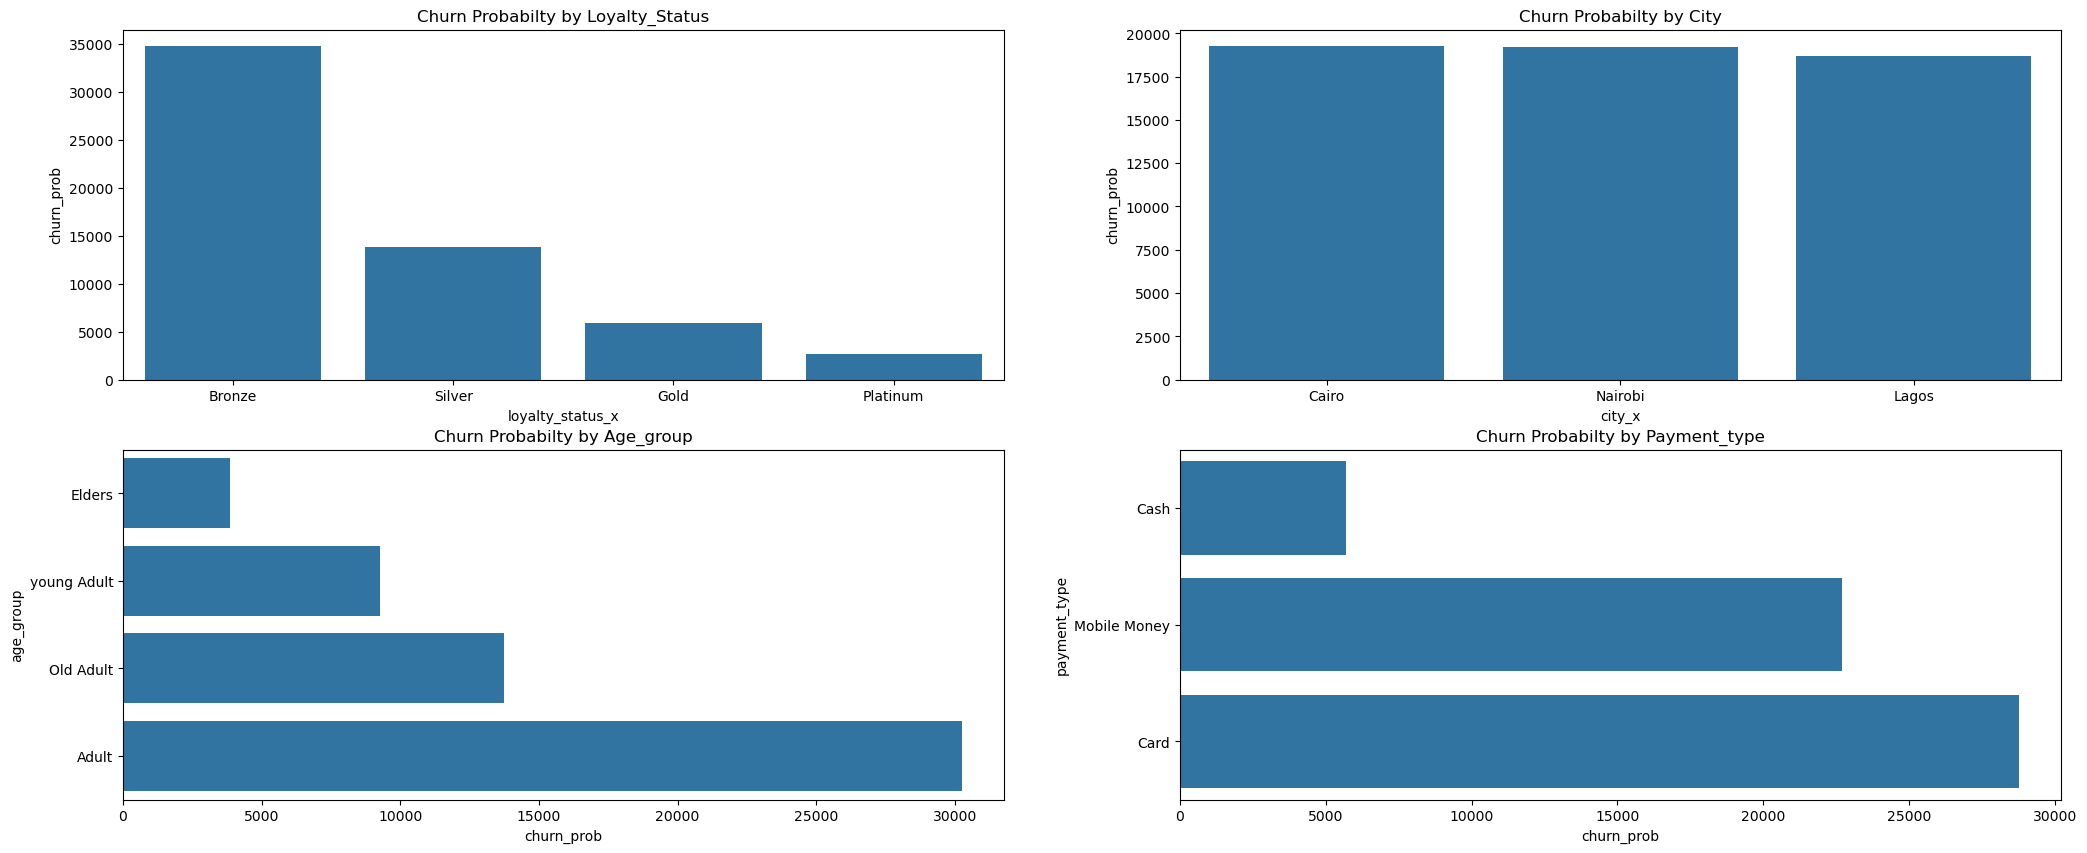

In [58]:
#CATEGORICAL COLUMNS
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(25, 10))
Loyalty_x =(riders_trips.groupby('loyalty_status_x')['churn_prob'].sum().reset_index().sort_values(by='churn_prob', ascending=False)) 
sns.barplot(x='loyalty_status_x', data = Loyalty_x, y = 'churn_prob', ax=axs[0,0])
axs[0,0].set_title('Churn Probabilty by Loyalty_Status')

City =(riders_trips.groupby('city_x')['churn_prob'].sum().reset_index().sort_values(by='churn_prob', ascending=False)) 
sns.barplot(x='city_x', data = City, y = 'churn_prob', ax=axs[0,1])
axs[0,1].set_title('Churn Probabilty by City')

age_g  =(riders_trips.groupby('age_group')['churn_prob'].sum().reset_index().sort_values(by='churn_prob', ascending=True))
sns.barplot(y='age_group', data = age_g , x = 'churn_prob', ax=axs[1,0])
axs[1,0].set_title('Churn Probabilty by Age_group')

Pay_t  =(riders_trips.groupby('payment_type')['churn_prob'].sum().reset_index().sort_values(by='churn_prob', ascending=True))
sns.barplot(y='payment_type', x = 'churn_prob', data = Pay_t, ax=axs[1,1])
axs[1,1].set_title('Churn Probabilty by Payment_type');


In [59]:
#Numerical Column Analysis 
#Focus on Churn Probability Against Numerical Variables

In [60]:
riders_trips.columns

Index(['user_id', 'signup_date', 'loyalty_status_x', 'age', 'city_x',
       'avg_rating_given', 'churn_prob', 'year', 'month', 'month_name',
       'quarter', 'age_group', 'riders_rating_group', 'churn_prob_Class',
       'trip_id', 'driver_id', 'fare', 'surge_multiplier', 'tip',
       'payment_type', 'pickup_time', 'dropoff_time', 'pickup_lat',
       'pickup_lng', 'dropoff_lat', 'dropoff_lng', 'weather', 'city_y',
       'loyalty_status_y'],
      dtype='object')

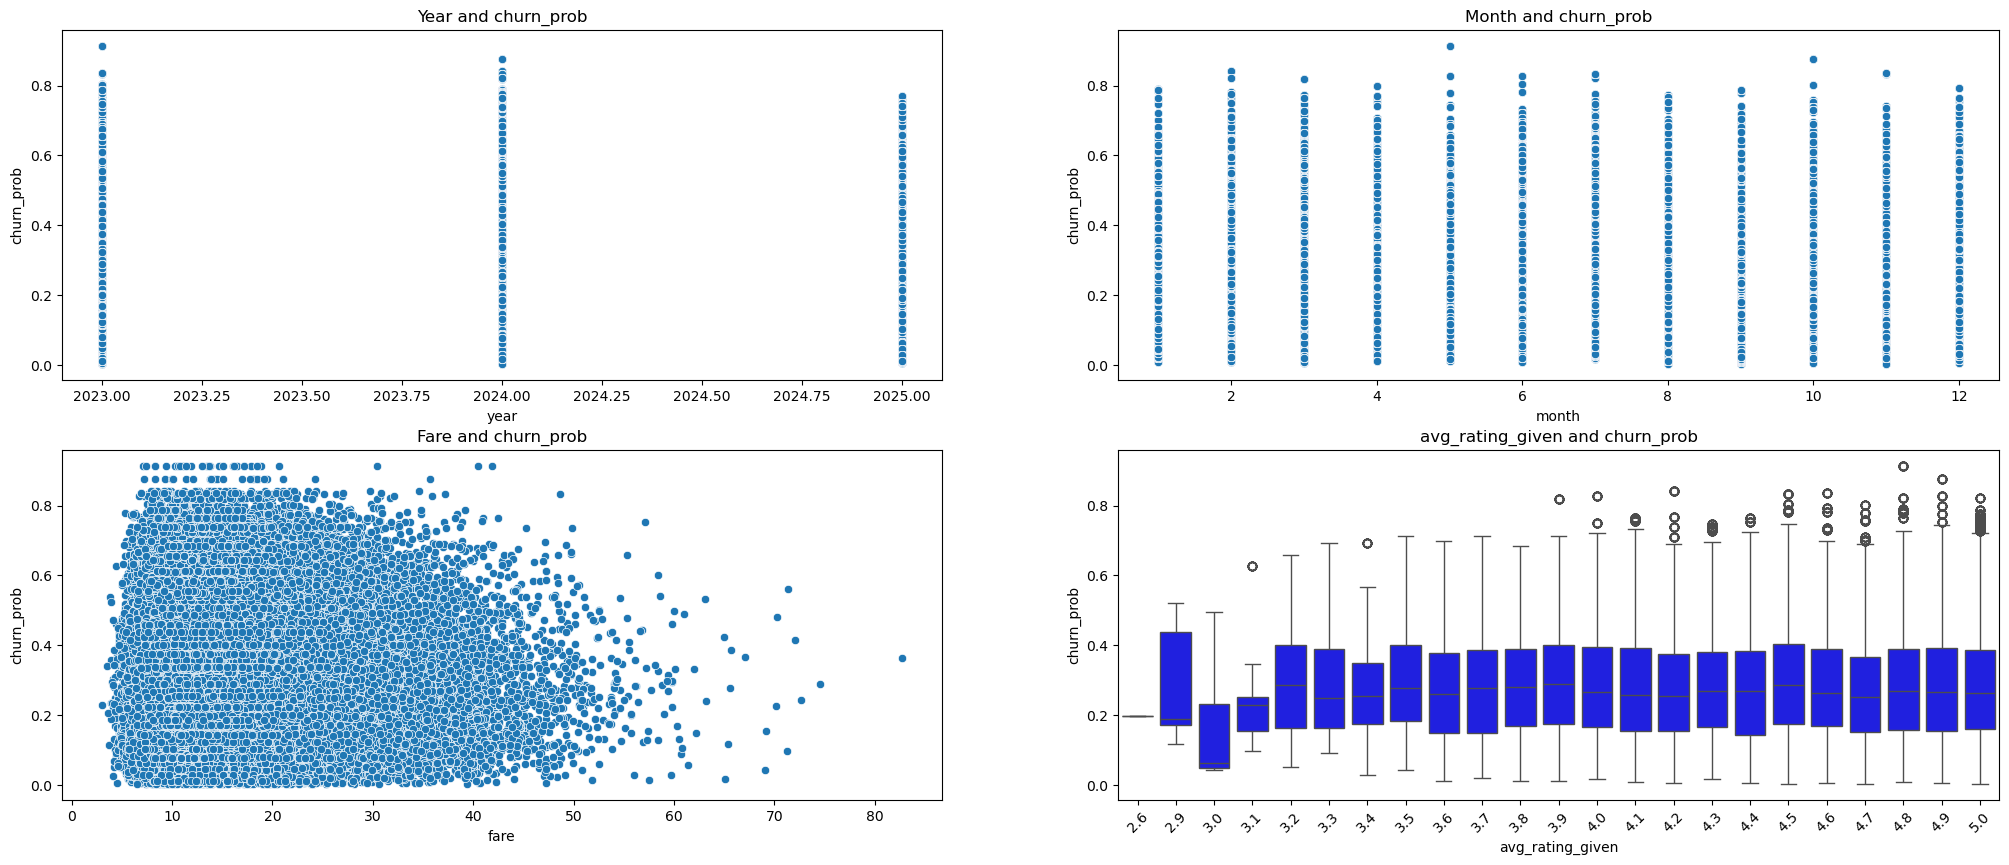

In [61]:
#NUMERICAL COLUMNS ANALYSIS
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(25,10))
sns.scatterplot(x='year', y='churn_prob', data=riders_trips, ax=axs[0,0])
axs[0,0].set_title('Year and churn_prob')

sns.scatterplot(x='month', data = riders_trips, y='churn_prob', ax=axs[0,1])
axs[0,1].set_title('Month and churn_prob')

sns.scatterplot(x='fare', data = riders_trips, y='churn_prob', ax=axs[1,0])
axs[1,0].set_title('Fare and churn_prob')

sns.boxplot(x='avg_rating_given', y='churn_prob', data=riders_trips, ax=axs[1,1], color='blue')
plt.xticks(rotation=45)
axs[1,1].set_title('avg_rating_given and churn_prob');

In [62]:
riders_trips.columns

Index(['user_id', 'signup_date', 'loyalty_status_x', 'age', 'city_x',
       'avg_rating_given', 'churn_prob', 'year', 'month', 'month_name',
       'quarter', 'age_group', 'riders_rating_group', 'churn_prob_Class',
       'trip_id', 'driver_id', 'fare', 'surge_multiplier', 'tip',
       'payment_type', 'pickup_time', 'dropoff_time', 'pickup_lat',
       'pickup_lng', 'dropoff_lat', 'dropoff_lng', 'weather', 'city_y',
       'loyalty_status_y'],
      dtype='object')

### Multivariate Analysis

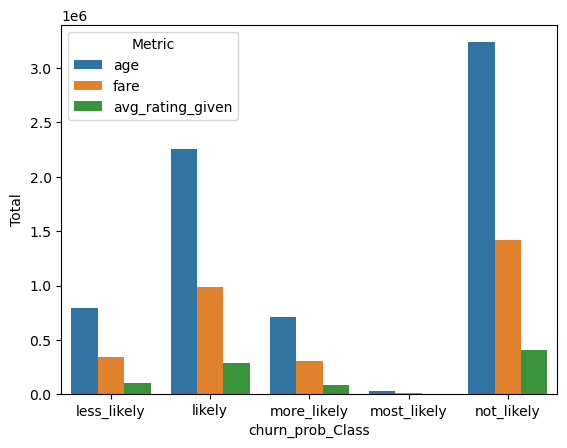

In [63]:
# Churn_prob_Class against Age, Fare and Avg_Rating_Given

Churn_Class = riders_trips.groupby('churn_prob_Class')[['age', 'fare', 'avg_rating_given']].sum().reset_index()
Churn_Class = pd.melt(Churn_Class, id_vars='churn_prob_Class', var_name= 'Metric', value_name='Total')
sns.barplot(data=Churn_Class, x='churn_prob_Class', y='Total', hue='Metric');

In [64]:
#From the chart, rider groups in Oldest people, highest fare, and highest rating  are not likely to churn

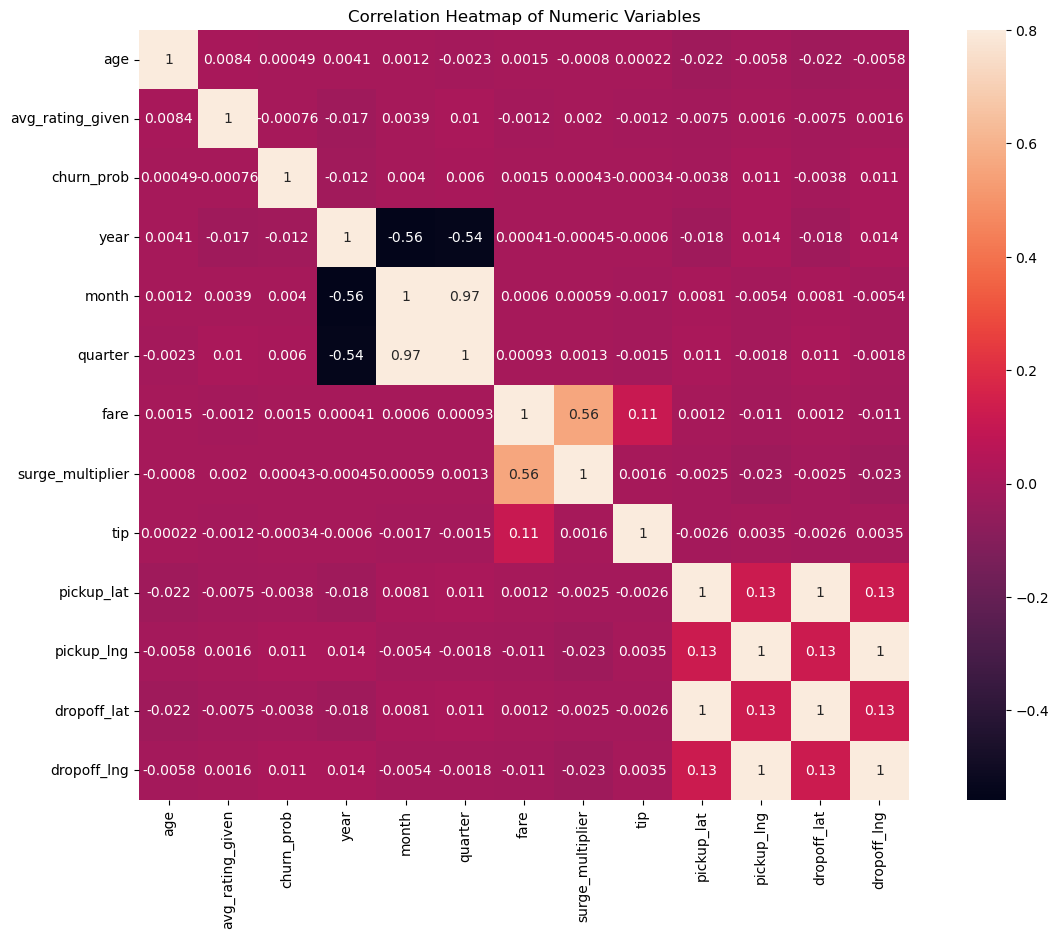

In [65]:
#correlation
a=riders_trips.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(a, vmax=.8, square=True, annot=True)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show();